<a href="https://colab.research.google.com/github/romenmeitei/STRING_Database_Analysis/blob/main/string_database_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the STRING network data
string_data = pd.read_csv("string_interactions.tsv", sep="\t")

# Rename columns to remove special characters
string_data.rename(columns={"#node1": "node1"}, inplace=True)

# Display the first few rows
print("First few rows of the STRING data:")
print(string_data.head())

# Extract key information: node1, node2, and combined_score
interactions = string_data[["node1", "node2", "combined_score"]]
print("\nProtein-Protein Interactions:")
print(interactions)


First few rows of the STRING data:
      node1     node2  node1_string_id  node2_string_id  \
0  A1S_0051  A1S_1380  400667.A1S_0051  400667.A1S_1380   
1  A1S_0051  A1S_2849  400667.A1S_0051  400667.A1S_2849   
2  A1S_0051  A1S_1881  400667.A1S_0051  400667.A1S_1881   
3  A1S_0051  A1S_2595  400667.A1S_0051  400667.A1S_2595   
4  A1S_0051  A1S_1655  400667.A1S_0051  400667.A1S_1655   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                         0.0            0                      0.000   
1                         0.0            0                      0.000   
2                         0.0            0                      0.000   
3                         0.0            0                      0.000   
4                         0.0            0                      0.172   

   homology  coexpression  experimentally_determined_interaction  \
0       0.0         0.000                                  0.000   
1       0.0         0.000          

In [ ]:
# Filter interactions with a high combined score
high_score_interactions = interactions[interactions["combined_score"] > 0.8]
print("\nHigh-Confidence Protein-Protein Interactions:")
print(high_score_interactions)



High-Confidence Protein-Protein Interactions:
       node1     node2  combined_score
8   A1S_0051  A1S_2840           0.935
10  A1S_1055  A1S_2840           0.811
18  A1S_1380  A1S_3459           0.888
25  A1S_1655  A1S_2840           0.894
31  A1S_1677  A1S_2840           0.802
32  A1S_1677  A1S_3459           0.911
33  A1S_1677  A1S_2877           0.914
40  A1S_1881  A1S_2840           0.946
50  A1S_2595  A1S_2840           0.826
51  A1S_2840  A1S_0051           0.935
52  A1S_2840  A1S_1055           0.811
54  A1S_2840  A1S_1655           0.894
55  A1S_2840  A1S_1677           0.802
56  A1S_2840  A1S_1881           0.946
57  A1S_2840  A1S_2595           0.826
58  A1S_2840  A1S_2877           0.914
59  A1S_2840  A1S_2849           0.946
60  A1S_2840  A1S_3459           0.947
66  A1S_2849  A1S_2840           0.946
71  A1S_2877  A1S_1677           0.914
73  A1S_2877  A1S_2840           0.914
76  A1S_3459  A1S_1380           0.888
78  A1S_3459  A1S_1677           0.911
81  A1S_3459  A1S

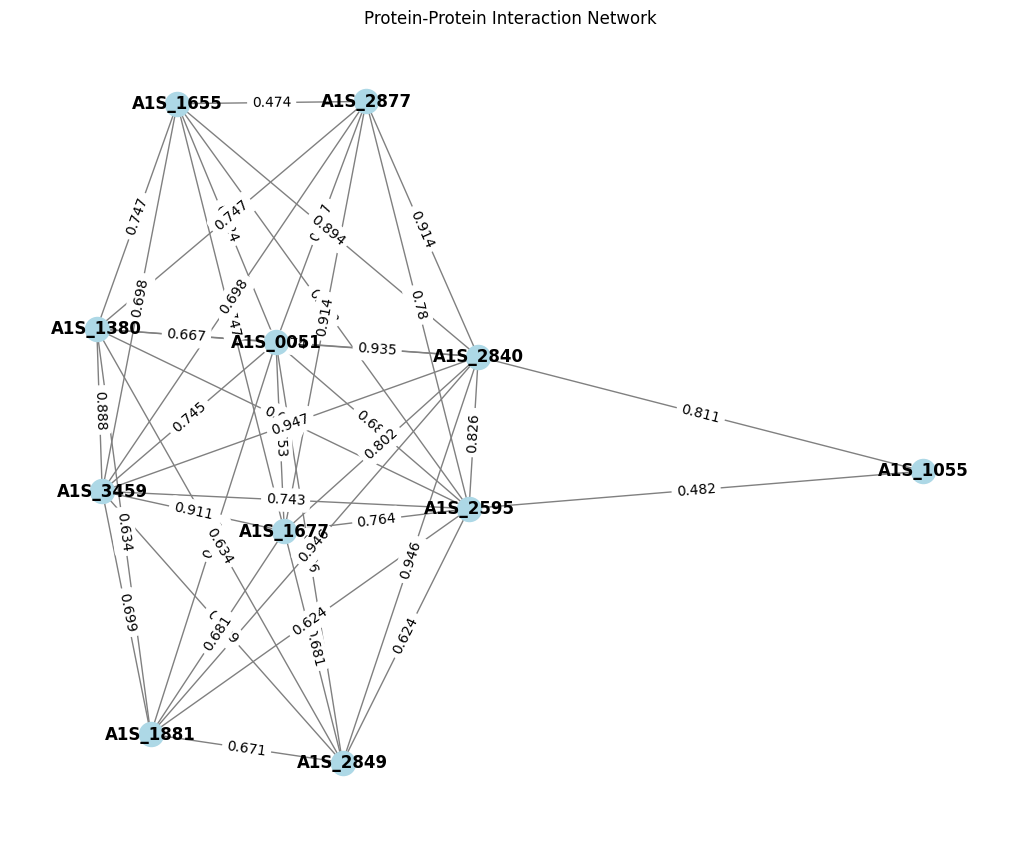

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the interactions
G = nx.from_pandas_edgelist(interactions, source='node1', target='node2', edge_attr='combined_score')

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'combined_score'))
plt.title("Protein-Protein Interaction Network")
plt.show()


In [ ]:
# Save the filtered high-confidence interactions to a new file
high_score_interactions.to_csv("high_confidence_interactions.csv", index=False)


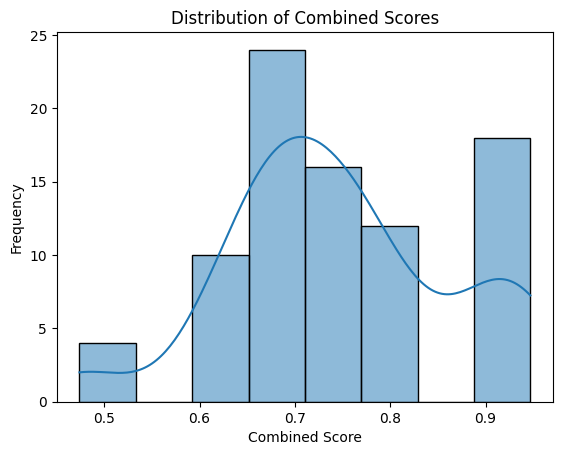

In [ ]:
import seaborn as sns

# Plot a histogram of combined scores
sns.histplot(interactions['combined_score'], kde=True)
plt.title("Distribution of Combined Scores")
plt.xlabel("Combined Score")
plt.ylabel("Frequency")
plt.show()
